#IMDB Sentiment Analysis - Logistic Regression Model
Georgios - Alexandros Vasilakopoulos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

##Loading the data:

In [ ]:
data_path = 'drive/MyDrive/ML/AI2/imdb-reviews.csv'
test_path = None #Insert the path here for testing

data = pd.read_csv(data_path, sep = '\t')
X = data['review']
Y = data[['rating']]

Y.loc[Y['rating'] < 7.0, 'rating']=0
Y.loc[Y['rating'] >= 7.0, 'rating']=1

X_train = X
Y_train = Y

if test_path:
    test_dataset = pd.read_csv(data_path, sep = '\t')
    X_test = test_dataset['review']
    Y_test = test_dataset[['rating']]
    Y_test.loc[Y_test['rating'] < 7.0, 'rating']=0
    Y_test.loc[Y_test['rating'] >= 7.0, 'rating']=1
else:
    X,X_test,Y,Y_test = train_test_split(X,Y,test_size=0.15, shuffle = True) #Partition of the dataset



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


##Data Preprocessing:

In [ ]:
import re

#Removing Numbers
X=X.str.replace('\d+', '')

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95,min_df=0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


##Training:

The parameters of the model that is being trained here are the ones which resulted from the GridSearch algorithm, in the end of the document
.

In [ ]:
from sklearn.pipeline import Pipeline
print(X.shape)

classifier = Pipeline([('Tfidf',vectorizer),('LogisticRegression',LogisticRegression(max_iter=1000,C=2))])
classifier.fit(X,np.ravel(Y))

(38256,)


Pipeline(steps=[('Tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=0.001,
                                 stop_words='english')),
                ('LogisticRegression', LogisticRegression(C=2, max_iter=1000))])

##Some random reviews and the predictions of the model

In [ ]:
import random
import textwrap


dispX = X_test.tolist()
dispY = np.ravel(Y_test).tolist()
for i in range(10):
    rand_index = random.randrange(len(dispX))
    x = dispX[rand_index]
    print("Review: ",'\n'.join(textwrap.wrap(x,180)))
    print("Prediction: ",classifier.predict([x])[0],". Actual: ", dispY[rand_index],"\n")


Review:  First thing first . In this genre movie the first thing you need is a good music , and thats where Mr. shankar and his party fails.<br /><br />music is completely pale and
uneffective. On other hand there is AJAY DEVGAN , WHO HAS REMOVED A LETTER 'A' from his spelling , done good job but was of no use to a bad casted movies like this.<br /><br />ASIN
is like a doll which is used to amuse public, even though she is good to look at but her role in movie is to dance, actually she is dancing member of a rock band and i don't think
any rock band have there dancer as a member of band.<br /><br />in nut shell this movie is a piece of crap a piece of ***t. watch it if you wanna get fooled.
Prediction:  0.0 . Actual:  0.0 

Review:  When my own child is begging me to leave the opening show of this film, I know it is bad. I wanted to claw my eyes out. I wanted to reach through the screen and slap Mike Myers for
sacrificing the last shred of dignity he had. This is one of the few films i

##Predictions on the validation/test data set:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

predictions_train = classifier.predict(X)
predictions_val = classifier.predict(X_test)

f1_train = f1_score(Y, predictions_train)
f1_val = f1_score(Y_test, predictions_val)

print("F1 Score (train):", f1_train)
print("Precision: (train)",precision_score(Y,predictions_train))
print("Recall: (train)",recall_score(Y, predictions_train))
print('\n')
print("F1 Score (validation):", f1_val)
print("Precision: (validation)",precision_score(Y_test,predictions_val))
print("Recall: (validation)",recall_score(Y_test, predictions_val))


F1 Score (train): 0.934122410839433
Precision: (train) 0.9279084158415841
Recall: (train) 0.9404201944183129


F1 Score (validation): 0.8967447341287378
Precision: (validation) 0.8913616398243045
Recall: (validation) 0.9021932424422051


##Evaluation of the model:

We will evaluate the model through the average metric scores produced by cross validation on the training dataset

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('Tfidf',TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.001)),('LogisticRegression',LogisticRegression(max_iter=1000,C=2))])

X = X_train.str.replace('\d+', '')
Y = Y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


###Metric Scores:

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipe,X,np.ravel(Y),cv=5, scoring = ('f1','precision','recall'))

print("Avg. F1 Score (cross validation):", np.mean(scores['test_f1']))
print("Avg. Precision (cross validation): ",np.mean(scores['test_precision']))
print("Avg. Recall (cross validation): ",np.mean(scores['test_recall']))


Avg. F1 Score (cross validation): 0.894595713061577
Avg. Precision (cross validation):  0.8872050215002293
Avg. Recall (cross validation):  0.9021238283491175


###Learning Curves:

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(pipe, X = X, y = np.ravel(Y), cv = 5,shuffle = True,return_times = True)

Text(0.5, 1.0, 'Performance of the model')

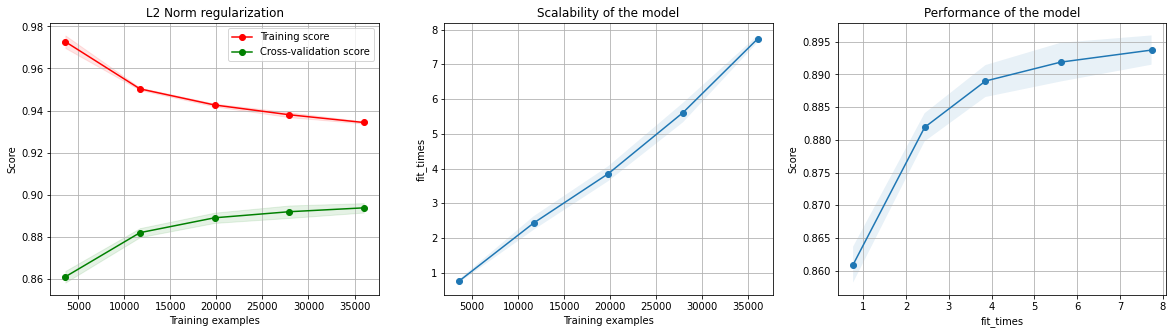

In [ ]:
import matplotlib.pyplot as plt

title = None
xlabel = None
ylabel=None
y = Y

train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)
fit_times_mean = np.mean(fit_times,axis=1)
fit_times_std = np.std(fit_times,axis=1)


_, axes = plt.subplots(1,3,figsize=(20,5))
axes[0].set_title("L2 Norm regularization")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes,test_scores_mean - test_scores_std, test_scores_mean +test_scores_std, alpha = 0.1, color = 'g')
axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std, train_scores_mean +train_scores_std, alpha = 0.1, color = 'r')

axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes[0].legend(loc="best")


##
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, "o-")
axes[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")



# Plot fit_time vs score
fit_time_argsort = fit_times_mean.argsort()
fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
test_scores_std_sorted = test_scores_std[fit_time_argsort]
axes[2].grid()
axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
axes[2].fill_between(
    fit_time_sorted,
    test_scores_mean_sorted - test_scores_std_sorted,
    test_scores_mean_sorted + test_scores_std_sorted,
    alpha=0.1,
)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")



##Regularization Alternatives:

###l1 Penalty:




In [ ]:
classifier_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2, max_iter=1000)

####Metric Scores

In [ ]:
from sklearn.model_selection import cross_val_score

pipe_l1 = Pipeline([('Tfidf',TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.001)),('LogisticRegression',classifier_l1)])
scores = cross_validate(pipe_l1,X,np.ravel(Y),cv=5, scoring = ('f1','precision','recall'))


print("Avg. F1 Score (cross validation):", np.mean(scores['test_f1']))
print("Avg. Precision (cross validation): ",np.mean(scores['test_precision']))
print("Avg. Recall (cross validation): ",np.mean(scores['test_recall']))


Avg. F1 Score (cross validation): 0.8905805664303148
Avg. Precision (cross validation):  0.8829228698935887
Avg. Recall (cross validation):  0.8983919166588283


###Elasticnet:

In [ ]:
classifier_elasticnet = LogisticRegression(penalty = 'elasticnet', solver = 'saga', C = 2, l1_ratio = 0.5, max_iter=1000)

####Metric Scores:

In [ ]:
from sklearn.model_selection import cross_val_score


#Using a smaller dataset in this case for faster training.
_, X_small, _, Y_small = train_test_split(X,Y,test_size=0.5, shuffle = True)

pipe_elasticnet = Pipeline([('Tfidf',TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.001)),('LogisticRegression',classifier_elasticnet)])
scores = cross_validate(pipe_elasticnet,X_small,np.ravel(Y_small),cv=5, scoring = ('f1','precision','recall'))


print("Avg. F1 Score (cross validation):", np.mean(scores['test_f1']))
print("Avg. Precision (cross validation): ",np.mean(scores['test_precision']))
print("Avg. Recall (cross validation): ",np.mean(scores['test_recall']))


Avg. F1 Score (cross validation): 0.8891723136017553
Avg. Precision (cross validation):  0.8776365291530599
Avg. Recall (cross validation):  0.9010342676549626


##Model Selection through GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([('Tfidf',TfidfVectorizer(stop_words='english')),('LogReg',LogisticRegression(max_iter=1000))])

param_grid = [
    {
    "Tfidf__min_df": [0.02,0.01,0.005,0.001],
    "LogReg__C": [2,1,0.1,0.01]
    },

    {
    "Tfidf__min_df": [0.02,0.01,0.005,0.001],
    "LogReg__C": [2,1,0.1,0.01],
    "LogReg__penalty": ['l1'],
    "LogReg__solver": ['liblinear']
    },

    # {
    # "Tfidf__min_df": [0.02,0.01,0.005,0.001],
    # "LogReg__C": [2,1,0.1,0.01],
    # "LogReg__l1_ratio":[0.75, 0.5, 0.25],
    # "LogReg__penalty": ['elasticnet'],
    # "LogReg__solver": ['saga']
    # }
]

_, X_small, _, Y_small = train_test_split(X,Y,test_size=0.5, shuffle = True)

search = GridSearchCV(pipe, param_grid, scoring = 'f1', cv = 5, n_jobs = -1)
search.fit(X_small,Y_small)

print(search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'LogReg__C': 2, 'Tfidf__min_df': 0.001}


In [ ]:
import pandas as pd

df = pd.DataFrame(search.cv_results_)
display(df.round(4))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LogReg__C,param_Tfidf__min_df,param_LogReg__penalty,param_LogReg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.10,0.08,1.05,2.43e-02,2,0.02,NaN,NaN,"{'LogReg__C': 2, 'Tfidf__min_df': 0.02}",0.86,0.84,0.86,0.86,0.86,0.86,7.90e-03,18
1,5.27,0.10,1.08,2.79e-02,2,0.01,NaN,NaN,"{'LogReg__C': 2, 'Tfidf__min_df': 0.01}",0.87,0.86,0.88,0.88,0.87,0.87,7.30e-03,10
2,5.50,0.08,1.09,2.75e-02,2,0.01,NaN,NaN,"{'LogReg__C': 2, 'Tfidf__min_df': 0.005}",0.89,0.87,0.88,0.89,0.88,0.88,7.50e-03,5
3,5.74,0.13,1.13,4.00e-03,2,0.0,NaN,NaN,"{'LogReg__C': 2, 'Tfidf__min_df': 0.001}",0.89,0.88,0.89,0.90,0.89,0.89,6.80e-03,1
4,4.91,0.04,1.05,9.70e-03,1,0.02,NaN,NaN,"{'LogReg__C': 1, 'Tfidf__min_df': 0.02}",0.87,0.84,0.86,0.86,0.86,0.86,8.60e-03,16
5,5.11,0.08,1.10,2.22e-02,1,0.01,NaN,NaN,"{'LogReg__C': 1, 'Tfidf__min_df': 0.01}",0.88,0.86,0.88,0.88,0.88,0.87,7.20e-03,9
6,5.57,0.57,1.55,5.52e-01,1,0.01,NaN,NaN,"{'LogReg__C': 1, 'Tfidf__min_df': 0.005}",0.88,0.87,0.88,0.89,0.88,0.88,6.20e-03,4
7,5.55,0.11,1.14,6.70e-03,1,0.0,NaN,NaN,"{'LogReg__C': 1, 'Tfidf__min_df': 0.001}",0.89,0.88,0.89,0.90,0.89,0.89,7.90e-03,2
8,4.71,0.03,1.04,1.91e-02,0.1,0.02,NaN,NaN,"{'LogReg__C': 0.1, 'Tfidf__min_df': 0.02}",0.85,0.84,0.85,0.86,0.85,0.85,6.20e-03,20
9,4.84,0.03,1.08,3.62e-02,0.1,0.01,NaN,NaN,"{'LogReg__C': 0.1, 'Tfidf__min_df': 0.01}",0.86,0.85,0.86,0.87,0.86,0.86,6.70e-03,15
